In [60]:
!ls /g/data/lp01/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/ts/gr1.5/v20181126/ts_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gr1.5_185001-201412.nc

/g/data/lp01/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/ts/gr1.5/v20181126/ts_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gr1.5_185001-201412.nc


In [240]:
import xarray as xr, matplotlib.pyplot as plt, numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????
#from mpl_toolkits.basemap import Basemap

In [5]:
ds = xr.open_dataset('/g/data/lp01/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/pr/gr1.5/v20181126/pr_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gr1.5_185001-201412.nc')
ds2 = xr.open_dataset('/g/data/lp01/CMIP6/CMIP/BCC/BCC-CSM2-MR/historical/r1i1p1f1/Amon/ts/gr1.5/v20181126/ts_Amon_BCC-CSM2-MR_historical_r1i1p1f1_gr1.5_185001-201412.nc')


In [6]:
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 120, lon: 240, time: 1980)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lon        (lon) float64 0.0 1.5 3.0 4.5 6.0 ... 354.0 355.5 357.0 358.5
  * lat        (lat) float64 -89.25 -87.75 -86.25 -84.75 ... 86.25 87.75 89.25
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    pr         (time, lat, lon) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.5 (http://m...
    Conventions:               CF-1.7 CMIP-6.2
    history:                   Mon Oct 21 23:02:13 2019: cdo -O -P 28 -remapc...
    source:                    BCC-CSM 2 MR (2017):   aerosol: none  atmos: B...
    institution:               Beijing Climate Center, Beijing 100081, China
    activity_id:               CMIP
    branch_method:             Standard
    branch_time_in_child:      0.0
    branch_time_in_parent:     2289.0
    comment:                   The model integration starts from the piContro...
    contact:                   Dr. Tongwen Wu(twwu@cma.gov.cn)
    creation_date:             2018-11-26T05:08:26Z
    data_specs_version:        01.00.27
    description:               DECK: historical
    experiment:                all-forcing simulation of the recent past
    experiment_id:             historical
    external_variables:        areacella
    forcing_index:             1
    frequency:                 mon
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.BCC.BCC-C...
    grid:                      T106
    grid_label:                gn
    initialization_index:      1
    institution_id:            BCC
    mip_era:                   CMIP6
    nominal_resolution:        100 km
    parent_activity_id:        CMIP
    parent_experiment_id:      piControl
    parent_mip_era:            CMIP6
    parent_source_id:          BCC-CSM2-MR
    parent_time_units:         days since 1850-01-01
    parent_variant_label:      r1i1p1f1
    physics_index:             1
    product:                   model-output
    realization_index:         1
    realm:                     atmos
    references:                Model described by Tongwen Wu et al. (JGR 2013...
    run_variant:               forcing: greenhouse gases,solar constant,aeros...
    source_id:                 BCC-CSM2-MR
    source_type:               AOGCM
    sub_experiment:            none
    sub_experiment_id:         none
    table_id:                  Amon
    table_info:                Creation Date:(30 July 2018) MD5:e53ff52009d0b...
    title:                     BCC-CSM2-MR output prepared for CMIP6
    tracking_id:               hdl:21.14100/7b6d329a-4b9a-4646-8e7c-0c2a56bfd098
    variable_id:               pr
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by BCC is licensed u...
    cmor_version:              3.3.2
    CDO:                       Climate Data Operators version 1.9.5 (http://m...
    cdo_openmp_thread_number:  28

In [98]:
#cdo -setunit,'mm/day' -mulc,86400.
pr = ds.pr *86400 #convert units to mm/day
ts = ds2.ts - 273 # convert units from K to C

In [99]:
pr_aus = pr.sel(lat=slice(-50,-5), lon=slice(110,160))
ts_aus = ts.sel(lat=slice(-50,-5), lon=slice(110,160))

In [100]:
pr_aus_mon = pr_aus.resample(time='M').mean(dim='time') # takes the monthly mean
pr_aus_ann = pr_aus.resample(time='Y').mean(dim='time') # takes the annual mean

ts_aus_mon = ts_aus.resample(time='M').mean(dim='time') # takes the monthly mean
ts_aus_ann = ts_aus.resample(time='Y').mean(dim='time') # takes the annual mean

In [101]:
pr_aus_mon # prints the array so I can see that there is more than 1 time step


<xarray.DataArray 'pr' (time: 1980, lat: 30, lon: 33)>
array([[[ 1.73767288,  1.64831525,  1.77720555, ...,  4.54633674,
          4.46698254,  4.23743773],
        [ 1.69730475,  1.80200409,  1.91899482, ...,  4.73368956,
          4.20345927,  3.92872322],
        [ 1.77236547,  1.84666885,  1.90683341, ...,  3.72453472,
          3.58645585,  3.31069197],
        ...,
        [ 4.90227363,  4.72487756,  4.88839351, ..., 13.78054158,
         10.91983742, 17.6859343 ],
        [ 7.46922309,  8.34875777, 12.69448581, ..., 14.66282406,
         12.59169141, 18.10108996],
        [ 7.69731039,  8.53091392, 14.56012395, ..., 10.42562176,
         12.50950894, 18.20958238]],

       [[ 2.64061162,  2.59389875,  2.75014633, ...,  2.09515136,
          2.41650646,  2.86000196],
        [ 2.36293557,  2.34034246,  2.46282218, ...,  2.11059696,
          2.1787533 ,  2.1708082 ],
        [ 1.88577813,  1.74696312,  1.65021799, ...,  1.6588986 ,
          1.71409721,  1.47777893],
        ...,
        [ 5.2530481 ,  4.84164449,  5.41481108, ..., 14.22638632,
         16.8626776 , 17.41077234],
        [ 8.24273718,  7.60045918, 10.1731777 , ..., 22.936498  ,
         21.50364267, 15.33775753],
        [ 7.52550485,  7.5165448 , 10.68587545, ..., 14.32005158,
         10.54816623,  8.59748656]],

       [[ 3.63434523,  3.13891283,  2.64902852, ...,  3.62451986,
          3.86748147,  3.51105833],
        [ 2.3922498 ,  2.09451172,  1.99637933, ...,  4.12523694,
          3.74086214,  3.0634735 ],
        [ 1.81301037,  1.91939967,  2.08536669, ...,  4.13092584,
          3.21679569,  2.82542064],
        ...,
        [ 5.49385222,  6.27285938,  6.2193952 , ..., 18.89658831,
         17.15445709, 12.65614866],
        [ 6.28777393,  8.24830066,  7.77119163, ..., 16.84239004,
         13.93448235, 13.31069525],
        [ 6.22032874,  7.15644127,  6.97249537, ...,  9.77788903,
          8.7975804 , 10.93199789]],

       ...,

       [[ 3.06104977,  3.07774841,  3.03511134, ...,  4.55728141,
          4.09367405,  3.6960968 ],
        [ 3.61552681,  3.62676694,  3.55297528, ...,  4.37241109,
          3.5813277 ,  3.56426948],
        [ 4.16196162,  4.08551081,  4.08691991, ...,  3.85323643,
          3.68801183,  3.89887118],
        ...,
        [ 3.97535374,  8.81145392,  6.17534872, ..., 11.38715912,
          7.30097315,  5.71616984],
        [ 4.00690846,  8.23763825,  8.67937482, ..., 15.12009501,
         11.23628486, 10.32466048],
        [ 5.17872681,  5.98755931,  7.21446814, ...,  7.77973174,
          6.20237847,  9.3126802 ]],

       [[ 2.42254724,  2.28499581,  2.1732038 , ...,  3.34559768,
          3.07603535,  2.82381226],
        [ 1.84271028,  1.82775361,  1.88554616, ...,  2.83942051,
          2.93975441,  2.83173504],
        [ 2.12070616,  2.13703185,  2.15494487, ...,  2.1576669 ,
          2.45338547,  2.48652358],
        ...,
        [ 2.6678988 ,  2.81881329,  3.70513354, ...,  4.11999186,
          4.9383244 ,  4.24267149],
        [ 3.34315068,  3.43938771,  4.77944061, ...,  3.84155216,
          4.88128482,  4.58198298],
        [ 4.78369652,  5.03991904,  6.34124   , ...,  3.68029807,
          3.99737855,  5.87379509]],

       [[ 1.84031107,  1.80139981,  1.73728155, ...,  2.72346453,
          2.79426574,  2.86009092],
        [ 1.38544813,  1.37492685,  1.3340987 , ...,  2.68040691,
          2.81707415,  3.08418194],
        [ 1.05276261,  1.05292983,  1.07051485, ...,  2.67306499,
          2.8783247 ,  2.8913266 ],
        ...,
        [ 2.47614752,  3.37477016,  3.06943115, ...,  9.40185129,
         14.19142876, 17.38051954],
        [ 6.22532268,  5.93595214,  5.42270683, ..., 15.85584213,
         15.79406667, 13.06108008],
        [ 8.94767828,  7.49663946,  6.83484336, ..., 17.63085765,
         11.41730002,  7.02451116]]])
Coordinates:
  * time     (time) object 1850-01-31 00:00:00 ... 2014-12-31 00:00:00
  * lon      (lon) float64 111.0 112.5 114.0 115.5 ... 154.5 156.0 157.5 159.0
  * lat

Text(0.5, 1.0, 'Annual precipitation variations')

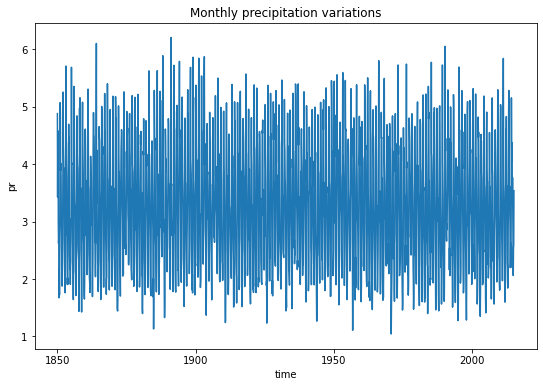

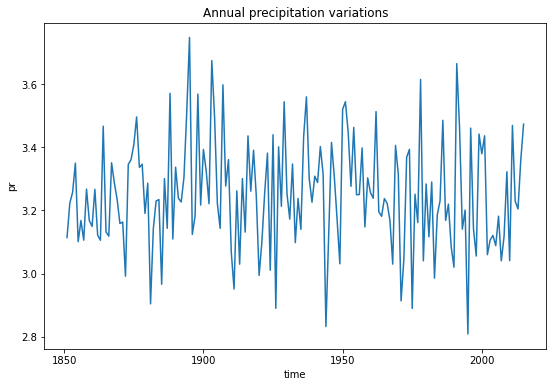

In [102]:
pr_aus_mon.mean(dim=('lat','lon')).plot(size=6)
plt.title('Monthly precipitation variations')
pr_aus_ann.mean(dim=('lat','lon')).plot(size=6)
plt.title('Annual precipitation variations')

Text(0.5, 1.0, 'Annual temperature variations')

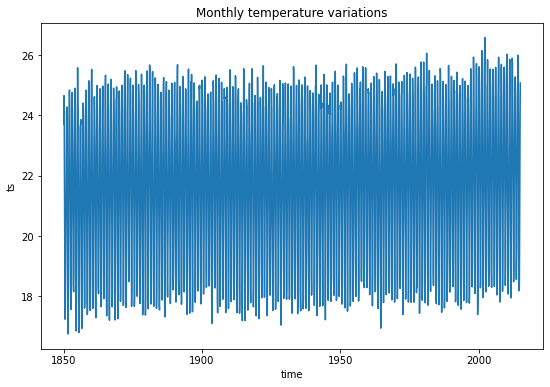

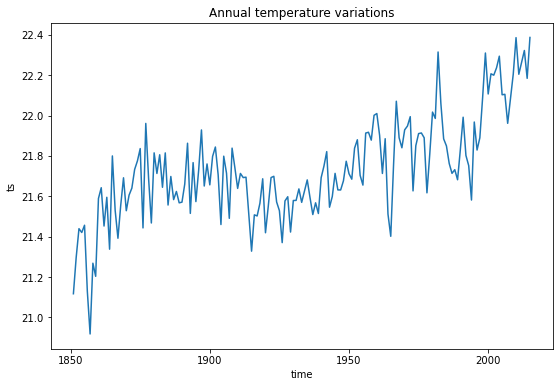

In [103]:
ts_aus_mon.mean(dim=('lat','lon')).plot(size=6) # calculate the lat and lon mean so i can plot a time series
plt.title('Monthly temperature variations')
ts_aus_ann.mean(dim=('lat','lon')).plot(size=6)
plt.title('Annual temperature variations')

In [124]:
# calculate the climatology from 1850 to 2014
pr_aus_clim = pr_aus.mean(dim = 'time')
pr_aus_clim

# calculate the climatology from 1850 to 2014
ts_aus_clim = ts_aus.mean(dim = 'time')
ts_aus_clim

<xarray.DataArray 'ts' (lat: 30, lon: 33)>
array([[ 8.084235 ,  8.196834 ,  8.29235  ,  8.353551 ,  8.395909 ,
         8.419217 ,  8.43238  ,  8.446882 ,  8.466351 ,  8.488221 ,
         8.513567 ,  8.53387  ,  8.542625 ,  8.540541 ,  8.534267 ,
         8.534618 ,  8.552912 ,  8.603122 ,  8.688114 ,  8.839261 ,
         9.044729 ,  9.265554 ,  9.572432 ,  9.979368 , 10.402101 ,
        10.826574 , 11.073929 , 11.122888 , 11.047737 , 10.903415 ,
        10.774691 , 10.698592 , 10.729102 ],
       [ 9.280953 ,  9.350873 ,  9.394251 ,  9.410718 ,  9.411279 ,
         9.400806 ,  9.388481 ,  9.377582 ,  9.372381 ,  9.372052 ,
         9.374377 ,  9.375194 ,  9.370972 ,  9.36291  ,  9.360458 ,
         9.369104 ,  9.399942 ,  9.467659 ,  9.576284 ,  9.771009 ,
        10.045446 , 10.385155 , 10.959645 , 11.735622 , 12.427618 ,
        12.939905 , 13.075035 , 12.937754 , 12.628186 , 12.269659 ,
        11.984787 , 11.772362 , 11.685766 ],
       [10.366062 , 10.379505 , 10.3681965, 10.342943 , 10.307109 ,
        10.269189 , 10.236945 , 10.206718 , 10.183849 , 10.168633 ,
        10.155764 , 10.143756 , 10.131604 , 10.121864 , 10.125069 ,
        10.143849 , 10.197203 , 10.304378 , 10.459067 , 10.701323 ,
        11.026702 , 11.458137 , 12.175536 , 13.066142 , 13.844802 ,
        14.421017 , 14.538156 , 14.266848 , 13.75083  , 13.228255 ,
        12.861869 , 12.602138 , 12.473697 ],
       [11.377862 , 11.337504 , 11.285377 , 11.2344   , 11.179585 ,
        11.129404 , 11.088614 , 11.049353 , 11.016206 , 10.990035 ,
        10.966399 , 10.9492035, 10.940795 , 10.950233 , 10.989499 ,
        11.054636 , 11.170365 , 11.329084 , 11.49274  , 11.699935 ,
        11.97327  , 12.344199 , 12.944816 , 13.354443 , 14.023645 ,
        15.378062 , 15.909559 , 15.717804 , 15.0185995, 14.209102 ,
        13.683455 , 13.3824215, 13.291744 ],
       [12.142841 , 12.081712 , 12.021822 , 11.971773 , 11.921621 ,
        11.876156 , 11.838211 , 11.80173  , 11.771302 , 11.748516 ,
        11.735181 , 11.741929 , 11.773375 , 11.85268  , 11.971224 ,
        12.090169 , 12.227997 , 12.361454 , 12.470134 , 12.612162 ,
        12.827377 , 13.15431  , 13.590228 , 12.550553 , 12.493984 ,
        15.766348 , 16.926228 , 17.041567 , 16.345154 , 15.264181 ,
        14.501114 , 14.124598 , 14.122238 ],
       [12.784876 , 12.735674 , 12.694663 , 12.663948 , 12.636035 ,
        12.612969 , 12.59416  , 12.577259 , 12.565861 , 12.563285 ,
        12.585782 , 12.650608 , 12.74963  , 12.899893 , 13.055879 ,
        13.167798 , 13.265131 , 13.347203 , 13.425449 , 13.561457 ,
        13.760721 , 14.042028 , 14.37128  , 13.728847 , 13.647122 ,
        16.000288 , 17.594273 , 18.125881 , 17.560858 , 16.35063  ,
        15.367804 , 14.878345 , 14.949938 ],
       [13.672978 , 13.683093 , 13.694069 , 13.701426 , 13.714393 ,
        13.735851 , 13.755906 , 13.774853 , 13.791199 , 13.806132 ,
        13.845669 , 13.936168 , 14.059417 , 14.206267 , 14.316716 ,
        14.374947 , 14.423058 , 14.474254 , 14.575272 , 14.796499 ,
        14.998739 , 15.112206 , 15.159963 , 15.278439 , 15.383815 ,
        16.069702 , 18.15296  , 19.211683 , 18.919062 , 17.769783 ,
        16.588707 , 15.840078 , 15.844017 ],
       [14.869141 , 15.021243 , 15.125416 , 15.137178 , 15.12243  ,
        15.140492 , 15.180649 , 15.22406  , 15.24977  , 15.255854 ,
        15.250539 , 15.264181 , 15.31431  , 15.3839445, 15.424305 ,
        15.446319 , 15.481614 , 15.510845 , 15.589207 , 15.735781 ,
        15.38337  , 15.33326  , 15.161974 , 15.114392 , 14.916697 ,
        15.564354 , 18.22556  , 20.05643  , 20.140945 , 19.331305 ,
        18.14908  , 17.057571 , 16.71825  ],
       [16.310072 , 16.7164   , 17.036425 , 17.053677 , 16.857176 ,
        16.69181  , 16.627558 , 16.62708  , 16.634184 , 16.639093 ,
        16.607088 , 16.528    , 16.473244 , 16.430532 , 16.368147 ,
        16.339138 , 16.42542  , 16.522816 , 16.534395 , 16.41755  ,
        15.332603 , 15.736284 , 15.801304 , 15.309388 , 14.27

In [131]:
print(ts_aus_clim) # check it's calculating right


<xarray.DataArray 'ts' (lat: 30, lon: 33)>
array([[ 8.084235 ,  8.196834 ,  8.29235  ,  8.353551 ,  8.395909 ,
         8.419217 ,  8.43238  ,  8.446882 ,  8.466351 ,  8.488221 ,
         8.513567 ,  8.53387  ,  8.542625 ,  8.540541 ,  8.534267 ,
         8.534618 ,  8.552912 ,  8.603122 ,  8.688114 ,  8.839261 ,
         9.044729 ,  9.265554 ,  9.572432 ,  9.979368 , 10.402101 ,
        10.826574 , 11.073929 , 11.122888 , 11.047737 , 10.903415 ,
        10.774691 , 10.698592 , 10.729102 ],
       [ 9.280953 ,  9.350873 ,  9.394251 ,  9.410718 ,  9.411279 ,
         9.400806 ,  9.388481 ,  9.377582 ,  9.372381 ,  9.372052 ,
         9.374377 ,  9.375194 ,  9.370972 ,  9.36291  ,  9.360458 ,
         9.369104 ,  9.399942 ,  9.467659 ,  9.576284 ,  9.771009 ,
        10.045446 , 10.385155 , 10.959645 , 11.735622 , 12.427618 ,
        12.939905 , 13.075035 , 12.937754 , 12.628186 , 12.269659 ,
        11.984787 , 11.772362 , 11.685766 ],
       [10.366062 , 10.379505 , 10.3681965, 10.3429

Text(0.5, 1.0, 'Annual precipitation anomalies')

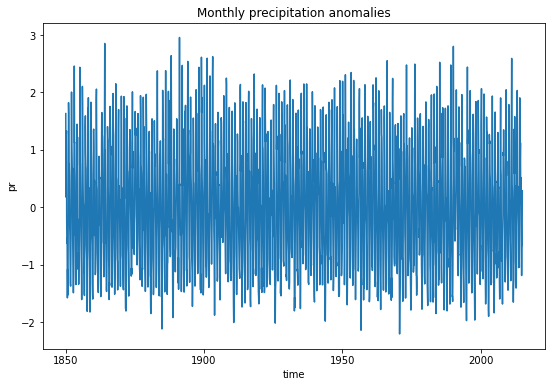

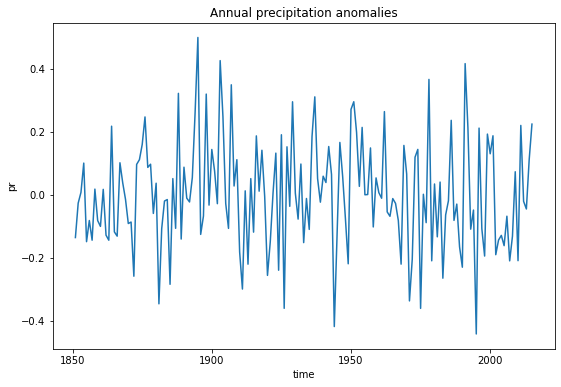

In [126]:
#calculate and plot the anomalies
pr_anom_mon = (pr_aus_mon - pr_aus_clim)
pr_anom_mon.mean(dim=('lat','lon')).plot(size=6)
plt.title('Monthly precipitation anomalies')

pr_anom_ann = (pr_aus_ann - pr_aus_clim)
pr_anom_ann.mean(dim=('lat','lon')).plot(size=6)
plt.title('Annual precipitation anomalies')

Text(0.5, 1.0, 'Annual temperature anomalies')

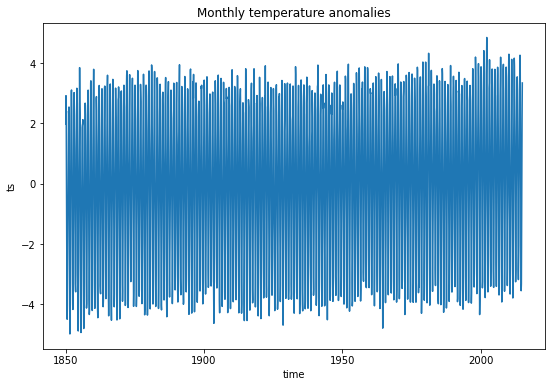

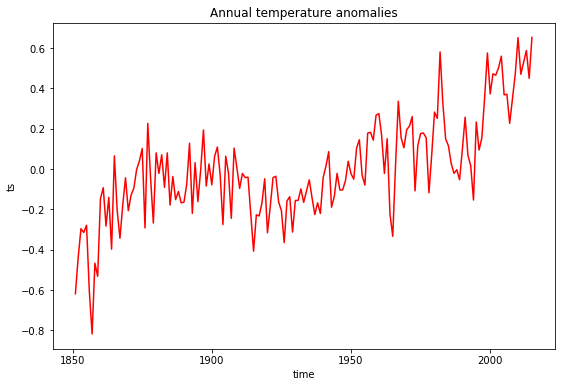

In [190]:
#calculate and plot the anomalies
ts_anom_mon = (ts_aus_mon - ts_aus_clim)
ts_anom_mon.mean(dim=('lat','lon')).plot(size=6)
plt.title('Monthly temperature anomalies')

ts_anom_ann = (ts_aus_ann - ts_aus_clim)
ts_anom_ann.mean(dim=('lat','lon')).plot(size=6, color = 'red')
plt.title('Annual temperature anomalies')




ValueError: x and y can be no greater than 2-D, but have shapes (165,) and (165, 30, 33)

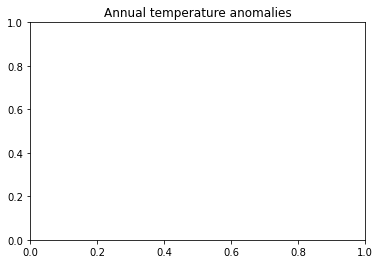

In [241]:
ts_anom_ann = (ts_aus_ann - ts_aus_clim)
red = ts_anom_ann.mean(dim=('lat','lon')) > 0

fig, ax = plt.subplots()
plt.title('Annual temperature anomalies')
ax.plot(t, red, t, ts_anom_ann)
plt.show()

Text(0.5, 1.0, 'Annual precipitation anomalies')

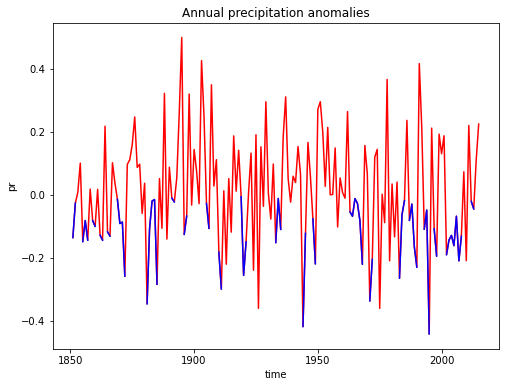

In [246]:
# trying to use masking but it's not quite working properly and not cutting off right at 0
pr_anom_ann = (pr_aus_ann - pr_aus_clim)
ann_mean = pr_anom_ann.mean(dim=('lat','lon'))

axes = plt.axes()
axes.figure.set_size_inches(8, 6)

ann_mean.plot(ax=axes, color = 'red') 
ann_mean.where(ann_mean<=0).plot(ax=axes, color = 'blue')
plt.title('Annual precipitation anomalies')

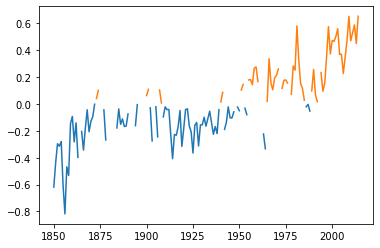

In [189]:
# trying to change the colour of a graph when it is above or below zero
t = np.linspace(1850, 2014, 165)
s = ts_anom_ann.mean(dim=('lat','lon'))

supper = np.ma.masked_where(s < 0, s)
slower = np.ma.masked_where(s >= 0, s)

fig, ax = plt.subplots()
ax.plot(t, slower, t, supper)
plt.show()

In [226]:
# import land fraction data
url = 'http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-3/historical/fx/atmos/fx/r0i0p0/latest/sftlf/sftlf_fx_ACCESS1-3_historical_r0i0p0.nc'
landfrac = xr.open_dataset(url).sftlf

Text(0.5, 1.0, 'pr anomalies')

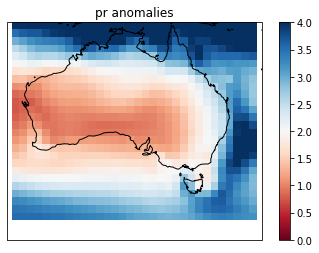

In [128]:
ax = plt.axes(projection=ccrs.PlateCarree()) # plot results with coastlines
ax.set_extent([110,160,-50,-10]) # sets axis bounds to show only australia region lon, lon, lat, lat
#ts_aus.mean(dim='time').plot(ax=ax)

im = ax.pcolormesh(pr_aus.mean(dim='time').lon, pr_aus.mean(dim='time').lat, pr_aus.mean(dim='time'), transform=ccrs.PlateCarree(), cmap='RdBu')
ax.coastlines()
im.set_clim(0, 4) # this changes the colour bar limits
plt.colorbar(im, ax=ax)
ax.set_title('pr anomalies')

Text(0.5, 1.0, 'ts anomalies')

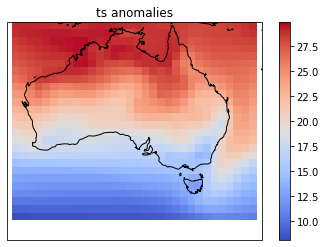

In [228]:
ax = plt.axes(projection=ccrs.PlateCarree()) # plot results with coastlines
ax.set_extent([110,160,-50,-10]) # sets axis bounds to show only australia region lon, lon, lat, lat
#ts_aus.mean(dim='time').plot(ax=ax)

im = ax.pcolormesh(ts_aus_clim.lon, ts_aus_clim.lat, ts_aus_clim, 
                   transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
#im.set_clim(0, 4) # this changes the colour bar limits
plt.colorbar(im, ax=ax)
ax.set_title('ts anomalies')

In [ ]:
# here's an example of masking
ax = plt.axes(projection=ccrs.PlateCarree()) # plot results with coastlines
ax.set_extent([110,160,-50,-10]) # sets axis bounds to show only australia region lon, lon, lat, lat


im = ax.pcolormesh(ts_aus_clim.lon, ts_aus_clim.lat, ts_aus_clim, 
                   transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
#im.set_clim(0, 4) # this changes the colour bar limits
plt.colorbar(im, ax=ax)
ax.set_title('ts anomalies')

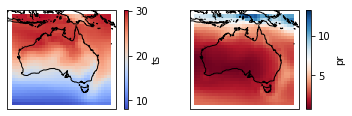

In [135]:
# here's an example of sub plotting 
ax = plt.subplot(221, projection=ccrs.PlateCarree())
ax.coastlines()
ts_aus.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

ax = plt.subplot(222, projection=ccrs.PlateCarree())
ax.coastlines()
pr_aus.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='RdBu')


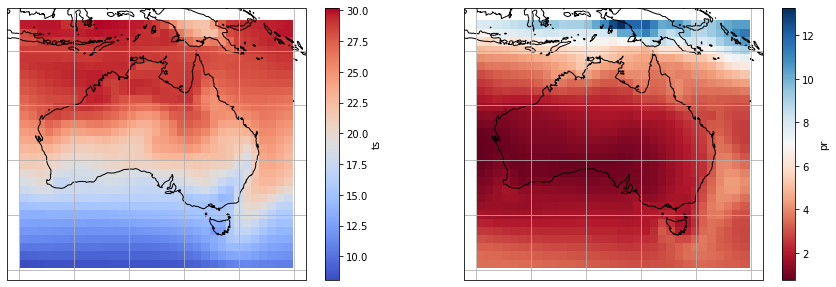

In [255]:
# if you do subplots this way then I can adjust the size of them

f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121, projection=ccrs.PlateCarree())
ax2 = f.add_subplot(122, projection=ccrs.PlateCarree())

ts_aus.mean(dim='time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')
ax.coastlines()
ax.gridlines() # here's how to add gridlines 


pr_aus.mean(dim='time').plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='RdBu')
ax2.coastlines()
ax2.gridlines() # here's how to add gridlines 

f.set_figheight(5) # these two parameters change the figure height and width 
f.set_figwidth(15)


Text(0.5, 1.0, 'Precipitation anomalies from a 1850-2014 climatology')

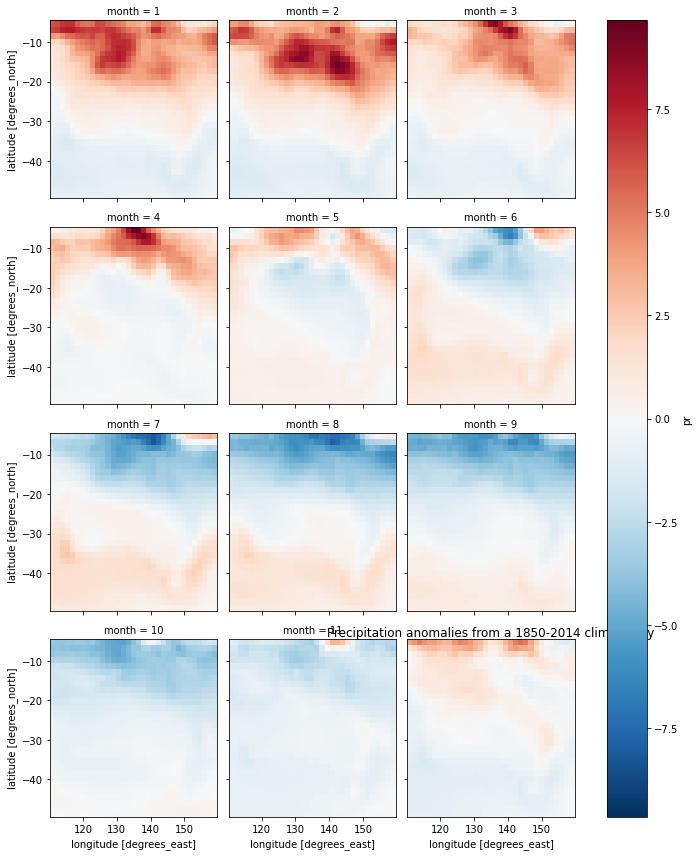

In [110]:
# Plot a map of the time mean of the anomaly for each month 
ax = pr_anom_mon.groupby('time.month').mean(dim='time').plot(col='month',col_wrap=3)
plt.title('Precipitation anomalies from a 1850-2014 climatology', verticalalignment='top')

# Plot a map of the time mean of the anomaly for each month 
#ax = plt.axes(projection=ccrs.PlateCarree())
#anom.groupby('time.month').mean(dim='time').plot(ax=ax, col='month',col_wrap=3)
#plt.title('Precipitation anomalies from a 1850-2014 climatology')
#ax.coastlines()
# it won't let me plot coastlines of a multiplot

<Figure size 720x216 with 0 Axes>

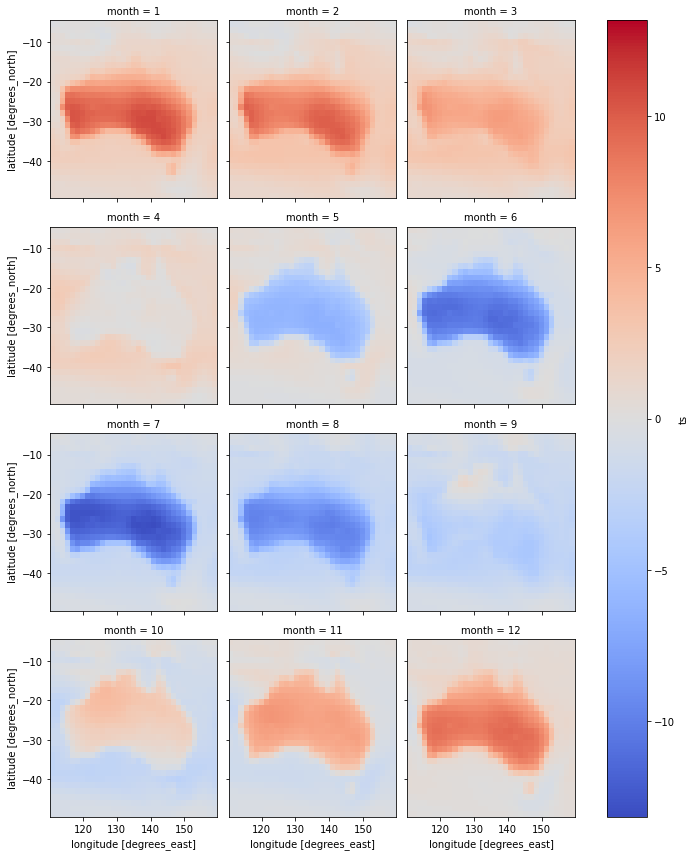

In [288]:
# Plot a map of the time mean of the anomaly for each month 
fig = plt.figure(figsize=(10,3))

fig.suptitle('Temperature anomalies from a 1850-2014 climatology', fontsize=16, verticalalignment='top') # not appearing

grouped = ts_anom_mon.groupby('time.month').mean(dim='time')
ax = grouped.plot(col='month',col_wrap=3, cmap = 'coolwarm')


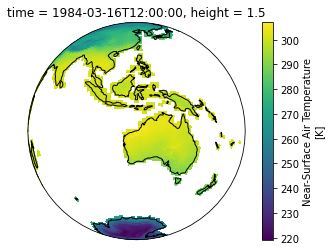

In [231]:
# example of using cartopy and also plotting only data over land using landfrac data (note that the grid resolution of this is low)

datapath = "http://dapds00.nci.org.au/thredds/dodsC/rr3/CMIP5/output1/CSIRO-BOM/ACCESS1-0/amip/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_amip_r1i1p1_197901-200812.nc"
data = xr.open_dataset(datapath)
surface_temp_slice = data.tas.sel(time = '1984-03')

ax = plt.axes(projection=ccrs.NearsidePerspective(central_latitude=-20, central_longitude=120))

surface_temp_slice.where(landfrac>0).plot(ax=ax, transform=ccrs.PlateCarree())


ax.coastlines()



AttributeError: module 'cartopy.crs' has no attribute 'feature'

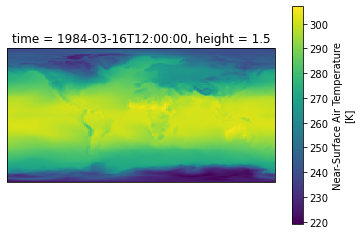

In [235]:
# ax = plt.axes(projection=ccrs.NearsidePerspective(central_latitude=-20, central_longitude=120))
ax = plt.axes(projection=ccrs.PlateCarree())

surface_temp_slice.plot(ax=ax)

ax.add_feature(ccrs.feature.OCEAN, zorder=100, edgecolor='k')
ax.coastlines()
ax.set_extent([100,160,-45,0]) # sets axis bounds to show only australia region

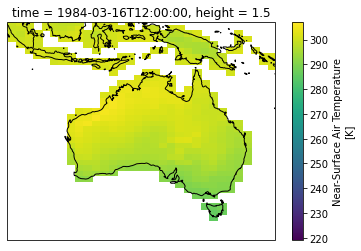

In [232]:
# ax = plt.axes(projection=ccrs.NearsidePerspective(central_latitude=-20, central_longitude=120))
ax = plt.axes(projection=ccrs.PlateCarree())

surface_temp_slice.where(landfrac>0).plot(ax=ax)

ax.coastlines()
ax.set_extent([100,160,-45,0]) # sets axis bounds to show only australia region
#surface_temp_slice.where(condition).plot

# plotting wind vectors
u = uwind.sel(month = month, phase = phase).u
v = vwind.sel(month = month, phase = phase).v
lat, lon, u_plot, v_plot = quiver_values(u,v)
# etc 
          
ax = fig.add_subplot(gs[row_n, col_num], projection  = ccrs.PlateCarree())

ax.quiver(lon, lat, u_plot,v_plot)
ax.set_extent([110, 155, -20,-10])
ax.outline_patch.set_visible(False)
ax.coastlines(resolution = '50m')